# Part 1 Rendering a Lambertian sphere

- https://github.com/oguzcanbekar/Lambertian-sphere/blob/main/Lambertian_sphere.py

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from math import cos
import numpy as np
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
def sphere(first,second,third):
        xx = np.linspace(-100, 100, 1501)
        yy = np.linspace(-100, 100, 1501)
        x, y = np.meshgrid(xx, yy)

        # for calculating partial derivaties
        # p = -x./sqrt(r^2-(x.^2 + y.^2));
        p1 = np.power(y,2)
        p2 = np.power(x,2)
        p3 = p1 + p2
        # radius = 100
        p4 = 100 ** 2 - (p3)
        p5 = np.lib.scimath.sqrt(p4)


        p = -x / p5
        q = -y / p5
        mask = np.copy(p4)

        # mask
        mask[mask >= 0] = 1
        mask[mask < 0] = 0

        I = np.array([first,second,third])
        I = np.transpose(I)
        
        # Assumption: constant albedo = 1
        albedo = 1
        
        # E(x, y)= Rρ,I(p, q) = ρI^Tn = {ρ/sqrt(1+p^2+q^2)}I^T[-p, -q, 1]^T
        R = (-albedo*(-I[0] * p - I[1] * q + I[2])) / (np.lib.scimath.sqrt(1 + np.power(p,2) + np.power(q,2)))
        
        mask = np.reshape(mask, (1501,1501))
        R = np.multiply (R, mask)
        R*=-1
        E=np.copy(R)
        E[E<0]=0
        where_are_NaNs = np.isnan(E)
        E[where_are_NaNs] = 0
        E = E / np.amax(E)
        
        # visualization
        plt.imshow(np.real(E), 'gray')
        plt.show()

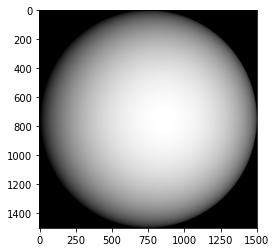

In [3]:
sphere(0.14, 0, 0.94)

## 3d sphere

In [4]:
u = np.linspace(0, 2*np.pi, 100)
v = np.linspace(0, np.pi, 100)
r = 100

x = r*np.outer(np.cos(u), np.sin(v))
y = r*np.outer(np.sin(u), np.sin(v))
z = r*np.outer(np.ones(np.size(u)), np.cos(v))

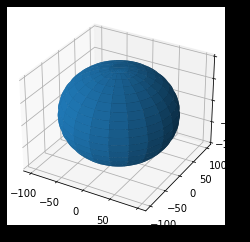

In [5]:
fig = plt.figure(facecolor='black')
ax = plt.axes(projection = "3d")
ax.plot_surface(x, y, z, rstride = 5, cstride = 5)
plt.show()

## Bonus

- The animation did not work on the jupyter notebook, and I couldn't find the reason.
- So I saved the result as "test.gif", please check the file.

In [6]:
import matplotlib.animation as animation

In [7]:
def sphere_animation(first,second,third):
        xx = np.linspace(-100, 100, 1501)
        yy = np.linspace(-100, 100, 1501)
        x, y = np.meshgrid(xx, yy)

        # for calculating partial derivaties
        # p = -x./sqrt(r^2-(x.^2 + y.^2));
        p1 = np.power(y,2)
        p2 = np.power(x,2)
        p3 = p1 + p2
        # radius = 100
        p4 = 100 ** 2 - (p3)
        p5 = np.lib.scimath.sqrt(p4)


        p = -x / p5
        q = -y / p5
        mask = np.copy(p4)

        # mask
        mask[mask >= 0] = 1
        mask[mask < 0] = 0
        
        # Assumption: constant albedo = 1
        albedo = 1
        
        fig, ax = plt.subplots()
        sss = np.linspace(0, second, 30); ims = []
        for i in range(len(sss)):
            I = np.array([first, sss[i],third])
            I = np.transpose(I)

            # E(x, y)= Rρ,I(p, q) = ρI^Tn = {ρ/sqrt(1+p^2+q^2)}I^T[-p, -q, 1]^T
            R = (-albedo*(-I[0] * p - I[1] * q + I[2])) / (np.lib.scimath.sqrt(1 + np.power(p,2) + np.power(q,2)))

            # mask_ = np.reshape(mask, (1501,1501))
            R = np.multiply (R, mask)
            R*=-1
            E=np.copy(R)
            E[E<0]=0
            where_are_NaNs = np.isnan(E)
            E[where_are_NaNs] = 0
            E = E / np.amax(E)

            im = ax.imshow(np.real(E), 'gray', animated=True)
            ims.append([im])
        # visualization
#         plt.imshow(np.real(E), 'gray')
        ani = animation.ArtistAnimation(fig, ims, interval=100)
        ani.save('test.gif', writer='imagemagick')
        plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


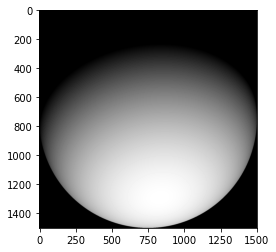

In [8]:
sphere_animation(0.15,1,0.94)